# Plots for paper

## Imports and directories

In [30]:
import os
while "notebooks" in os.getcwd():
    os.chdir("../")


In [31]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science'])

In [32]:
result_path = Path("results")

In [33]:
plot_directory = Path("plots")

## Plots for precision and time comparison

### Separate

In [34]:
iterations = [100, 500, 1000, 1500, 2000, 3000, 4000, 5000, 6000]

def get_mean(std: float, comparison_path: Path):

    means = []
    stds = []
    time_differences = []
    for i in iterations:
        arr = np.load(comparision_path / f'precision_comparision_std_{std}_iterations_{i}.npy')
        arr = arr[arr[:, 2] != 0]
        diffs =  np.abs(arr[:, 0] - arr[:, 1])
        #diffs = diffs / arr[:, 1]
        mean = np.mean(arr[:, 1])
        means.append(np.mean(diffs)/mean)
        stds.append(np.std(diffs))
        t_diff = np.mean(arr[:, 3] - arr[:, 4])
        time_differences.append(np.mean(t_diff))
    return means

def get_mean_for_set_size(std: float, size: int, comparison_path: Path):

    means = []
    stds = []
    time_differences = []
    for i in iterations:
        try:
            arr = np.load(comparison_path / f'precision_comparision_std_{std}_iterations_{i}.npy')
        except:
            return means
        arr = arr[arr[:, 2] == size]
        arr = arr[arr[:, 2] != 0]
        print(arr)
        print(arr[0:10, :])
        diffs =  np.abs(arr[:, 0] - arr[:, 1])#*arr[:, 2]
        #diffs = diffs / arr[:, 1]
        mean = np.mean(arr[:, 0])
        means.append(np.mean(diffs)/mean)
        stds.append(np.std(diffs))
        t_diff = np.mean(arr[:, 3] - arr[:, 4])
        time_differences.append(np.mean(t_diff))
    return means

def plot_for_std_separate(std: float, comparision_path: Path, features_number: int):
    fig, (ax1) = plt.subplots(1, 1, )
    for i in range(1, features_number+1, 2):
        means = get_mean_for_set_size(std, i, comparision_path)
        print(means)
        if i >= 12:
            ax1.plot(iterations, means, label = str(i), linestyle='dashed')
        else:
            ax1.plot(iterations, means, label = str(i))
    
    means = get_mean(std, comparision_path)
    ax1.plot(iterations, means, label = "Mean", linestyle = 'dashed', linewidth=2)
    ax1.set_xlim(0, 6000)
    #ax1.set_ylim(0, 0.018)
    ax1.set(xlabel='Iterations', ylabel='PG Difference')
    ax1.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), frameon=True)
    title = f'Mean difference in PG \n between methods'
    ax1.set(title = title)
    #plt.yscale("log")
    #fig.subplots_adjust(right=0.75)
    print(comparision_path)
    comparision_path = str(comparision_path)
    comparision_path = comparision_path[comparision_path.find('/')+1:]
    comparision_path = comparision_path[:comparision_path.find('/')]
    model_name = comparision_path
    print(model_name)
    plt.savefig(f"{plot_directory}/precision_{model_name}_{std}.pdf")
    plt.show()

[[0.00000000e+00 4.35207426e-14 1.00000000e+00 2.55683827e+00
  7.37905502e-04]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 1.32061601e+00
  5.85079193e-04]
 [0.00000000e+00 7.99360578e-15 1.00000000e+00 5.70469141e-01
  7.85589218e-04]
 ...
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 6.76923037e-01
  7.76529312e-04]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 7.00949430e-01
  3.67439270e-01]
 [0.00000000e+00 4.32282980e-04 1.00000000e+00 5.45644045e-01
  1.40976906e-03]]
[[0.00000000e+00 4.35207426e-14 1.00000000e+00 2.55683827e+00
  7.37905502e-04]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 1.32061601e+00
  5.85079193e-04]
 [0.00000000e+00 7.99360578e-15 1.00000000e+00 5.70469141e-01
  7.85589218e-04]
 [0.00000000e+00 7.99360578e-15 1.00000000e+00 7.18540430e-01
  2.10452080e-03]
 [0.00000000e+00 3.75255382e-14 1.00000000e+00 4.39537764e-01
  1.10387802e-03]
 [0.00000000e+00 3.75255382e-14 1.00000000e+00 3.50112677e-01
  6.00099564e-04]
 [0.00000000e+00 7.99360578e-15 1.

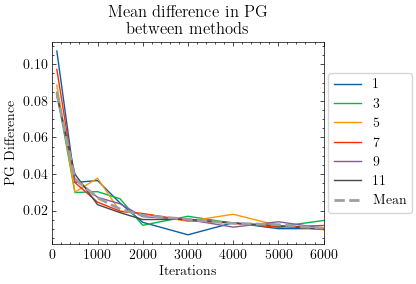

[[0.00000000e+00 4.35207426e-14 1.00000000e+00 2.86076450e+00
  9.80854034e-04]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 2.51229596e+00
  7.41958618e-04]
 [0.00000000e+00 7.99360578e-15 1.00000000e+00 2.51900125e+00
  2.95989513e-02]
 ...
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 1.40585184e+00
  5.06771803e-01]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 1.15150666e+00
  6.97851181e-04]
 [2.31950518e-02 2.91439809e-02 1.00000000e+00 1.59382248e+00
  2.17454672e-01]]
[[0.00000000e+00 4.35207426e-14 1.00000000e+00 2.86076450e+00
  9.80854034e-04]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 2.51229596e+00
  7.41958618e-04]
 [0.00000000e+00 7.99360578e-15 1.00000000e+00 2.51900125e+00
  2.95989513e-02]
 [0.00000000e+00 7.99360578e-15 1.00000000e+00 1.97948933e+00
  3.37905884e-02]
 [0.00000000e+00 3.75255382e-14 1.00000000e+00 2.81988358e+00
  1.77741051e-03]
 [0.00000000e+00 3.75255382e-14 1.00000000e+00 2.65815330e+00
  7.24315643e-04]
 [0.00000000e+00 7.99360578e-15 1.

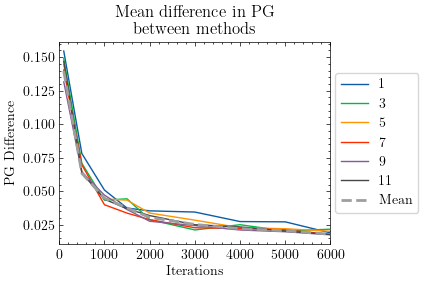

[[0.00000000e+00 4.35207426e-14 1.00000000e+00 2.14290857e+00
  1.01518631e-03]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 3.63919497e-01
  6.84738159e-04]
 [0.00000000e+00 7.99360578e-15 1.00000000e+00 3.32535982e-01
  8.88109207e-04]
 ...
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 7.22640753e-01
  7.46488571e-04]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 2.86705732e-01
  7.94649124e-04]
 [6.13012083e-02 6.46145410e-02 1.00000000e+00 7.22692966e-01
  1.77478790e-03]]
[[0.00000000e+00 4.35207426e-14 1.00000000e+00 2.14290857e+00
  1.01518631e-03]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 3.63919497e-01
  6.84738159e-04]
 [0.00000000e+00 7.99360578e-15 1.00000000e+00 3.32535982e-01
  8.88109207e-04]
 [0.00000000e+00 7.99360578e-15 1.00000000e+00 1.62227654e+00
  1.48756027e-01]
 [0.00000000e+00 3.75255382e-14 1.00000000e+00 1.27156043e+00
  1.96766853e-03]
 [0.00000000e+00 3.75255382e-14 1.00000000e+00 7.50920773e-01
  6.93321228e-04]
 [0.00000000e+00 6.52145582e-07 1.

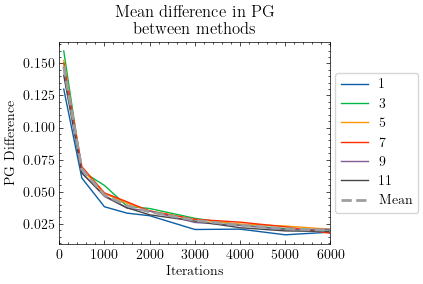

[[0.00000000e+00 4.35207426e-14 1.00000000e+00 1.08720088e+00
  8.80002975e-04]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 9.98824120e-01
  7.45773315e-04]
 [0.00000000e+00 7.99360578e-15 1.00000000e+00 2.09730387e-01
  7.13348389e-04]
 ...
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 1.25511122e+00
  1.04260445e-03]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 1.54253054e+00
  6.45399094e-04]
 [6.95851554e-02 7.66943291e-02 1.00000000e+00 7.80319214e-01
  4.42528725e-03]]
[[0.00000000e+00 4.35207426e-14 1.00000000e+00 1.08720088e+00
  8.80002975e-04]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 9.98824120e-01
  7.45773315e-04]
 [0.00000000e+00 7.99360578e-15 1.00000000e+00 2.09730387e-01
  7.13348389e-04]
 [0.00000000e+00 7.99360578e-15 1.00000000e+00 8.82688761e-01
  1.84321404e-03]
 [0.00000000e+00 6.50452591e-07 1.00000000e+00 1.67166185e+00
  1.71566010e-03]
 [0.00000000e+00 3.75255382e-14 1.00000000e+00 1.55006385e+00
  6.63280487e-04]
 [3.33528778e-02 3.21191079e-02 1.

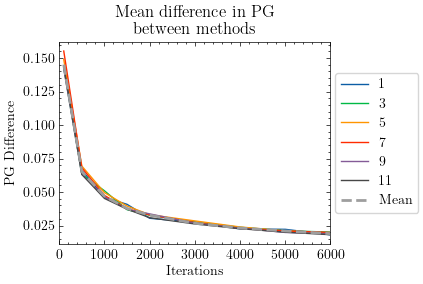

[[2.55384456e-02 2.80793663e-02 1.00000000e+00 1.31030750e+00
  3.40986252e-03]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 1.37200904e+00
  6.01291656e-04]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 2.95319557e-01
  6.32762909e-04]
 ...
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 9.54307556e-01
  1.10888481e-03]
 [0.00000000e+00 7.99360578e-15 1.00000000e+00 5.80015707e+00
  1.74806118e-02]
 [0.00000000e+00 7.99360578e-15 1.00000000e+00 5.64055419e+00
  1.15251541e-03]]
[[2.55384456e-02 2.80793663e-02 1.00000000e+00 1.31030750e+00
  3.40986252e-03]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 1.37200904e+00
  6.01291656e-04]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 2.95319557e-01
  6.32762909e-04]
 [0.00000000e+00 4.35207426e-14 1.00000000e+00 2.92999268e-01
  8.74280930e-04]
 [0.00000000e+00 7.99360578e-15 1.00000000e+00 5.79413652e-01
  8.85248184e-04]
 [0.00000000e+00 7.99360578e-15 1.00000000e+00 1.25348806e-01
  8.87414694e-01]
 [0.00000000e+00 4.35207426e-14 1.

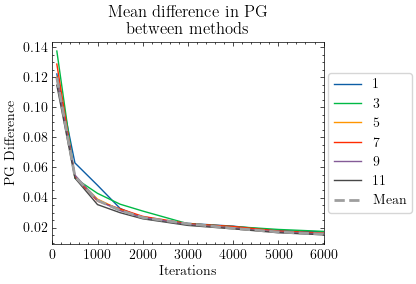

In [35]:
comparision_path = Path("results/wine_model_single/time/")
for s in [0.01, 0.03, 0.1, 0.3, 1.0]:
    plot_for_std_separate(s, comparision_path, 11)

[[0.00000000e+00 2.44140625e-04 1.00000000e+00 1.00764203e+00
  9.81807709e-04]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 7.12004900e-01
  7.90357590e-04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.07811975e-01
  5.22613525e-04]
 ...
 [0.00000000e+00 6.10351562e-05 1.00000000e+00 1.55884576e+00
  8.91208649e-04]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 6.48726225e-01
  1.08909607e-03]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 3.23367500e+00
  9.29379463e-02]]
[[0.00000000e+00 2.44140625e-04 1.00000000e+00 1.00764203e+00
  9.81807709e-04]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 7.12004900e-01
  7.90357590e-04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.07811975e-01
  5.22613525e-04]
 [0.00000000e+00 2.44140625e-04 1.00000000e+00 5.80192566e-01
  1.08337402e-03]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 2.75591373e-01
  7.56025314e-04]
 [0.00000000e+00 1.52587891e-05 1.00000000e+00 3.31048965e-01
  5.01632690e-04]
 [0.00000000e+00 2.44140625e-04 1.

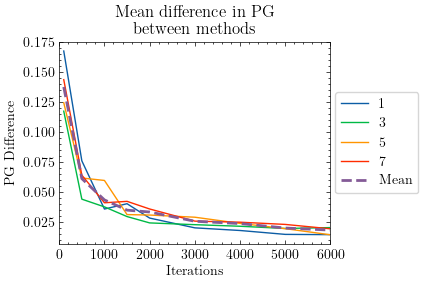

[[0.00000000e+00 2.44140625e-04 1.00000000e+00 1.74480963e+00
  6.45562172e-01]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 4.21853781e-01
  8.14437866e-04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 5.40165186e-01
  8.19444656e-04]
 ...
 [0.00000000e+00 6.10351562e-05 1.00000000e+00 1.27908969e+00
  7.60555267e-04]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 9.99832869e-01
  1.63292885e-03]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 7.22836256e-01
  6.69956207e-04]]
[[0.00000000e+00 2.44140625e-04 1.00000000e+00 1.74480963e+00
  6.45562172e-01]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 4.21853781e-01
  8.14437866e-04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 5.40165186e-01
  8.19444656e-04]
 [0.00000000e+00 2.44140625e-04 1.00000000e+00 2.69552231e-01
  1.16157532e-03]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 1.01005459e+00
  1.09100342e-03]
 [0.00000000e+00 1.52587891e-05 1.00000000e+00 2.84509659e-01
  1.53541565e-03]
 [0.00000000e+00 2.44140625e-04 1.

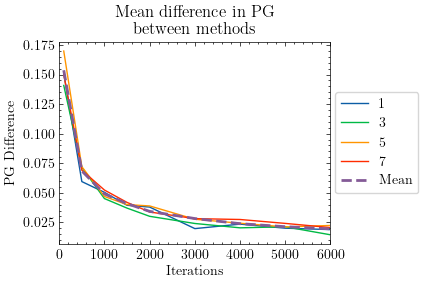

[[0.00000000e+00 2.44140625e-04 1.00000000e+00 1.56523919e+00
  4.10115719e-02]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 2.83635855e-01
  8.96692276e-04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 2.42038727e-01
  8.13722610e-04]
 ...
 [0.00000000e+00 6.10351562e-05 1.00000000e+00 2.36818838e+00
  6.83546066e-04]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 1.85155272e+00
  1.55282021e-03]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 2.41892195e+00
  3.41896534e-01]]
[[0.00000000e+00 2.44140625e-04 1.00000000e+00 1.56523919e+00
  4.10115719e-02]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 2.83635855e-01
  8.96692276e-04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 2.42038727e-01
  8.13722610e-04]
 [0.00000000e+00 2.44140625e-04 1.00000000e+00 4.88473415e-01
  8.68320465e-04]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 5.84718227e-01
  8.74996185e-04]
 [0.00000000e+00 1.52587891e-05 1.00000000e+00 6.98438644e-01
  5.88524580e-01]
 [0.00000000e+00 2.44140625e-04 1.

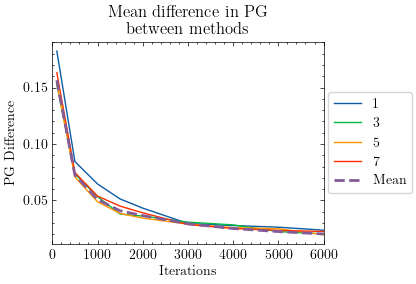

[[0.00000000e+00 2.44140625e-04 1.00000000e+00 8.53669167e-01
  4.97338772e-02]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 5.61197996e-01
  7.93457031e-04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.61625671e-01
  5.32627106e-04]
 ...
 [0.00000000e+00 6.10351562e-05 1.00000000e+00 1.55743289e+00
  5.67913055e-04]
 [0.00000000e+00 4.67337668e-05 1.00000000e+00 1.09195685e+00
  1.51583195e-01]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 6.87144279e-01
  7.26222992e-04]]
[[0.00000000e+00 2.44140625e-04 1.00000000e+00 8.53669167e-01
  4.97338772e-02]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 5.61197996e-01
  7.93457031e-04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.61625671e-01
  5.32627106e-04]
 [0.00000000e+00 2.44140625e-04 1.00000000e+00 1.23636079e+00
  7.36236572e-04]
 [0.00000000e+00 4.67300415e-05 1.00000000e+00 9.72771883e-01
  7.61747360e-04]
 [0.00000000e+00 1.52587891e-05 1.00000000e+00 6.52011633e-01
  8.77618790e-04]
 [0.00000000e+00 2.44140625e-04 1.

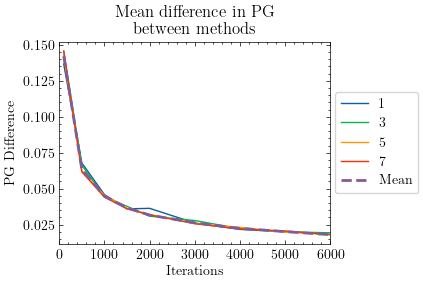

In [36]:
comparision_path = Path("results/housing_model_single/time/")
for s in [0.01, 0.03, 0.1, 0.3]:
    plot_for_std_separate(s, comparision_path, 8)

[[0.00000000e+00 1.53034925e-05 1.00000000e+00 1.06758444e+01
  2.31435800e+00]
 [0.00000000e+00 4.76464629e-05 1.00000000e+00 9.20700216e+00
  2.81418586e+00]
 [0.00000000e+00 4.92503198e+00 1.00000000e+00 7.46543097e+00
  6.41387248e+00]
 ...
 [3.58626507e+06 3.26025527e+06 1.00000000e+00 2.86731458e+00
  1.80278373e+00]
 [0.00000000e+00 1.98796579e+03 1.00000000e+00 2.45672846e+00
  2.93067718e+00]
 [5.65752202e+06 6.02419142e+06 1.00000000e+00 3.14549732e+00
  2.13635445e+00]]
[[0.00000000e+00 1.53034925e-05 1.00000000e+00 1.06758444e+01
  2.31435800e+00]
 [0.00000000e+00 4.76464629e-05 1.00000000e+00 9.20700216e+00
  2.81418586e+00]
 [0.00000000e+00 4.92503198e+00 1.00000000e+00 7.46543097e+00
  6.41387248e+00]
 [3.42422938e+07 2.87060289e+07 1.00000000e+00 8.90649319e+00
  2.07878590e+00]
 [0.00000000e+00 2.77382880e-03 1.00000000e+00 7.21116042e+00
  3.91187119e+00]
 [0.00000000e+00 1.11043453e-04 1.00000000e+00 9.88152599e+00
  5.54186678e+00]
 [1.33586423e+08 1.45201677e+08 1.

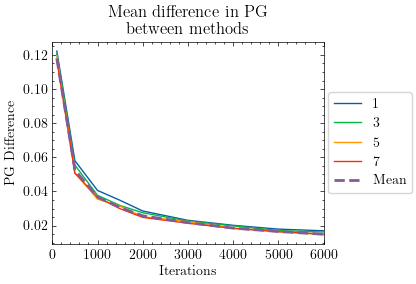

[[0.00000000e+00 1.34844606e+05 1.00000000e+00 4.20717692e+00
  1.76267481e+00]
 [0.00000000e+00 4.76464629e-05 1.00000000e+00 3.07954240e+00
  2.04023361e+00]
 [4.06209614e+05 5.24905859e+05 1.00000000e+00 3.54777551e+00
  2.97805500e+00]
 ...
 [3.06462651e+06 3.33455225e+06 1.00000000e+00 4.66946030e+00
  2.89908290e+00]
 [3.12634292e+06 3.14130616e+06 1.00000000e+00 5.39828277e+00
  7.17090321e+00]
 [6.82230597e+06 7.55759592e+06 1.00000000e+00 4.27064681e+00
  1.61434221e+00]]
[[0.00000000e+00 1.34844606e+05 1.00000000e+00 4.20717692e+00
  1.76267481e+00]
 [0.00000000e+00 4.76464629e-05 1.00000000e+00 3.07954240e+00
  2.04023361e+00]
 [4.06209614e+05 5.24905859e+05 1.00000000e+00 3.54777551e+00
  2.97805500e+00]
 [8.12718181e+07 7.38148846e+07 1.00000000e+00 3.93128943e+00
  1.58786678e+00]
 [0.00000000e+00 4.43078696e+02 1.00000000e+00 4.27519250e+00
  1.84824300e+00]
 [0.00000000e+00 7.18682718e+05 1.00000000e+00 1.62126875e+00
  1.92780375e+00]
 [1.56818844e+08 1.48594851e+08 1.

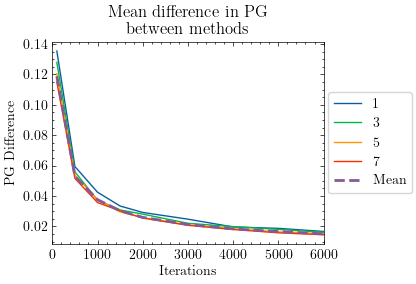

[[3.03058510e+07 2.43151637e+07 1.00000000e+00 4.88487267e+00
  1.53268027e+00]
 [0.00000000e+00 4.76464629e-05 1.00000000e+00 4.61652732e+00
  2.39238429e+00]
 [7.18947666e+07 6.75881098e+07 1.00000000e+00 3.13054204e+00
  7.90951014e-01]
 ...
 [6.20242826e+06 6.28767204e+06 1.00000000e+00 2.06806755e+00
  1.88281035e+00]
 [4.53825174e+07 4.55770751e+07 1.00000000e+00 4.14056039e+00
  7.01134896e+00]
 [2.57022413e+07 2.67513398e+07 1.00000000e+00 4.49067974e+00
  2.74567008e+00]]
[[3.03058510e+07 2.43151637e+07 1.00000000e+00 4.88487267e+00
  1.53268027e+00]
 [0.00000000e+00 4.76464629e-05 1.00000000e+00 4.61652732e+00
  2.39238429e+00]
 [7.18947666e+07 6.75881098e+07 1.00000000e+00 3.13054204e+00
  7.90951014e-01]
 [2.77319117e+08 2.81960860e+08 1.00000000e+00 1.17577577e+00
  1.35322809e+00]
 [4.23719632e+05 7.70683166e+05 1.00000000e+00 1.27603841e+00
  4.75099325e-01]
 [6.60522059e+07 5.44182611e+07 1.00000000e+00 2.66836548e+00
  1.44463205e+00]
 [3.04590586e+08 3.26645137e+08 1.

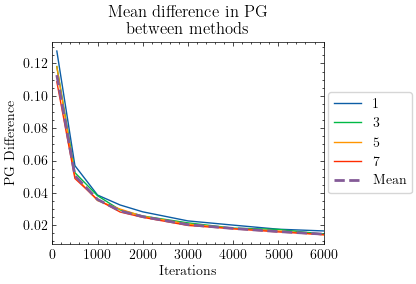

[[5.00608919e+07 4.56034046e+07 1.00000000e+00 5.70866418e+00
  2.16701245e+00]
 [0.00000000e+00 4.75864646e+01 1.00000000e+00 1.89513588e+00
  1.47034693e+00]
 [4.83419515e+08 4.38607454e+08 1.00000000e+00 2.52493167e+00
  2.03225446e+00]
 ...
 [2.10645566e+07 2.78304173e+07 1.00000000e+00 4.02001977e+00
  4.19046712e+00]
 [5.59864557e+08 4.91462444e+08 1.00000000e+00 3.24689507e+00
  1.14483142e+01]
 [1.72353386e+08 1.54659117e+08 1.00000000e+00 3.10860014e+00
  1.77326989e+00]]
[[5.00608919e+07 4.56034046e+07 1.00000000e+00 5.70866418e+00
  2.16701245e+00]
 [0.00000000e+00 4.75864646e+01 1.00000000e+00 1.89513588e+00
  1.47034693e+00]
 [4.83419515e+08 4.38607454e+08 1.00000000e+00 2.52493167e+00
  2.03225446e+00]
 [5.47857140e+08 6.84691325e+08 1.00000000e+00 1.69269848e+00
  2.58221507e+00]
 [5.26682036e+06 6.34346245e+06 1.00000000e+00 8.91633034e+00
  4.96043682e+00]
 [1.38674376e+08 1.31385382e+08 1.00000000e+00 7.93788719e+00
  8.20156908e+00]
 [5.53536043e+08 5.48509135e+08 1.

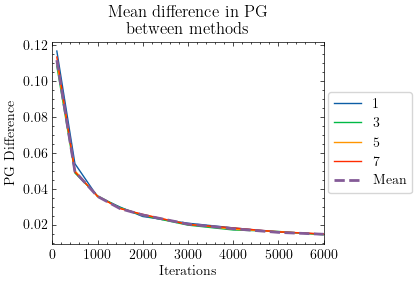

[[5.01037100e+07 5.11393214e+07 1.00000000e+00 7.19184661e+00
  2.71826673e+00]
 [5.81907968e+05 1.20262714e+06 1.00000000e+00 5.17860675e+00
  4.76495266e-01]
 [8.63526246e+08 9.56521612e+08 1.00000000e+00 2.57035327e+00
  3.58694959e+00]
 ...
 [4.48224179e+07 5.83792395e+07 1.00000000e+00 1.84272599e+00
  2.88975167e+00]
 [4.79053243e+09 5.31457245e+09 1.00000000e+00 1.61147213e+00
  7.88241673e+00]
 [9.46175848e+08 1.01279635e+09 1.00000000e+00 2.27189875e+00
  2.07343197e+00]]
[[5.01037100e+07 5.11393214e+07 1.00000000e+00 7.19184661e+00
  2.71826673e+00]
 [5.81907968e+05 1.20262714e+06 1.00000000e+00 5.17860675e+00
  4.76495266e-01]
 [8.63526246e+08 9.56521612e+08 1.00000000e+00 2.57035327e+00
  3.58694959e+00]
 [1.71097947e+09 1.71000901e+09 1.00000000e+00 3.39291883e+00
  6.56653023e+00]
 [1.24860905e+08 1.07481370e+08 1.00000000e+00 3.68846798e+00
  1.58377957e+00]
 [7.45487282e+08 7.16654208e+08 1.00000000e+00 3.40587854e+00
  3.40099621e+00]
 [1.60095166e+09 1.44523209e+09 1.

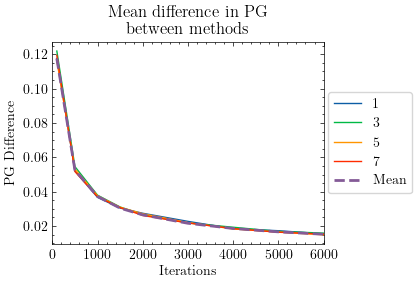

In [37]:
comparision_path = Path("results/housing_model/time/")
for s in [0.01, 0.03, 0.1, 0.3, 1.0]:
    plot_for_std_separate(s, comparision_path, 8)

## Get relative error for model, std, iterations

In [38]:
def get_relative_error(std: float, comparision_path: Path, iterations: int):

    arr = np.load(comparison_path / f'precision_comparision_std_{std}_iterations_{iterations}.npy')
    arr = arr[arr[:, 2] != 0]
    diffs =  np.abs(arr[:, 0] - arr[:, 1])#*arr[:, 2]
    diffs = diffs / arr[:, 1]
    return np.mean(diffs)

In [39]:
comparision_path = Path("results/wine_model_single/time/")
parameters =[
    [0.01, 100],
    [0.03, 100],
    [0.1, 100],
    [0.3, 100]
] 